In [25]:
import pandas as pd
import os

In [27]:
folder_path = '/Users/macbookpro/Downloads/dataset/1_movies_per_genre'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = [pd.read_csv(os.path.join(folder_path, f)) for f in csv_files]

dataframes

[                        name  year movie_rated run_length  \
 0            The Dark Knight  2008       PG-13   2h 32min   
 1               Pulp Fiction  1994           R   2h 34min   
 2              The Godfather  1972           R   2h 55min   
 3                      Se7en  1995           R    2h 7min   
 4   The Silence of the Lambs  1991           R   1h 58min   
 ..                       ...   ...         ...        ...   
 95                   Con Air  1997           R   1h 55min   
 96             Donnie Brasco  1997           R    2h 7min   
 97            Batman Returns  1992       PG-13    2h 6min   
 98             The Nice Guys  2016           R   1h 56min   
 99       Law Abiding Citizen  2009           R   1h 49min   
 
                        genres             release_date  rating  num_raters  \
 0      Action; Crime; Drama;        18 July 2008 (USA)     9.0     2224522   
 1              Crime; Drama;     14 October 1994 (USA)     8.9     1767445   
 2              C

In [33]:
# Classification function
def classify_name(name):
    name_lower = str(name).lower()
    if "war" in name_lower:
        return "War"
    elif "hero" in name_lower:
        return "Hero"
    elif "spy" in name_lower:
        return "Spy"
    elif "fight" in name_lower or "fist" in name_lower:
        return "Fight"
    else:
        return "Other"

# List to store updated DataFrames
classified_dataframes = []

# Process each file
for f in csv_files:
    file_path = os.path.join(folder_path, f)
    df = pd.read_csv(file_path)

    # Clean column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Apply classification if 'name' column exists
    if 'name' in df.columns:
        df['name_class'] = df['name'].apply(classify_name)

    # Optionally add a column with genre from filename (e.g., Action.csv -> Action)
    genre = os.path.splitext(f)[0]
    df['genre'] = genre

    classified_dataframes.append(df)

# Optionally combine all into one big DataFrame
all_movies_df = pd.concat(classified_dataframes, ignore_index=True)

# Preview result
print(all_movies_df[['name', 'genre', 'name_class']].head())

                       name  genre name_class
0           The Dark Knight  Crime      Other
1              Pulp Fiction  Crime      Other
2             The Godfather  Crime      Other
3                     Se7en  Crime      Other
4  The Silence of the Lambs  Crime      Other


In [134]:
def recommend_movies(movie_name, n_recommendations=10):
    movie_name_lower = movie_name.lower()

    # Transform query to TF-IDF vector
    query_vec = vectorizer.transform([movie_name_lower])

    # Fetch more neighbors than needed to filter duplicates later
    distances, indices = knn.kneighbors(query_vec, n_neighbors=50)

    # Get recommended movie names
    recommended_names = all_movies_df.iloc[indices.flatten()]['name'].values

    # Remove duplicates and the movie itself
    seen = set()
    unique_recommendations = []
    for name in recommended_names:
        name_lower = str(name).lower()
        if name_lower != movie_name_lower and name_lower not in seen:
            seen.add(name_lower)
            unique_recommendations.append(name)
        if len(unique_recommendations) == n_recommendations:
            break

    # Print result
    print(f"\nRecommendations for '{movie_name}':")
    for i, rec in enumerate(unique_recommendations, 1):
        print(f"{i}. {rec}")


In [136]:
recommend_movies("The Dark Knight", n_recommendations=10)



Recommendations for 'The Dark Knight':
1. The Dark Knight Rises
2. Dark City
3. Dark Shadows
4. Thor: The Dark World
5. Transformers: Dark of the Moon
6. Zero Dark Thirty
7. Star Trek
8. Black Panther
9. Transformers
10. Spider-Man: Homecoming


In [97]:
def recommend_by_rating(movie_name, n=5):
    movie_name_lower = movie_name.lower()
    # Find movie index
    idx = all_movies_df[all_movies_df['name'].str.lower() == movie_name_lower].index
    if len(idx) == 0:
        print("Movie not found.")
        return
    idx = idx[0]
    
    target_rating = all_movies_df.loc[idx, 'rating']
    # Calculate difference in ratings
    all_movies_df['rating_diff'] = abs(all_movies_df['rating'] - target_rating)
    # Sort by closest rating and exclude the movie itself
    recommendations = all_movies_df[all_movies_df.index != idx].sort_values('rating_diff').head(n)
    
    print(f"Movies with ratings closest to '{movie_name}' (rating={target_rating}):")
    for i, row in recommendations.iterrows():
        print(f"{row['name']} - Rating: {row['rating']}")

# Example usage
recommend_by_rating("The Dark Knight", n=5)


Movies with ratings closest to 'The Dark Knight' (rating=9.0):
The Dark Knight - Rating: 9.0
The Godfather: Part II - Rating: 9.0
The Dark Knight - Rating: 9.0
The Godfather: Part II - Rating: 9.0
Pulp Fiction - Rating: 8.9


count    1700.000000
mean        7.457706
std         0.736682
min         3.500000
25%         7.000000
50%         7.600000
75%         8.000000
max         9.300000
Name: rating, dtype: float64


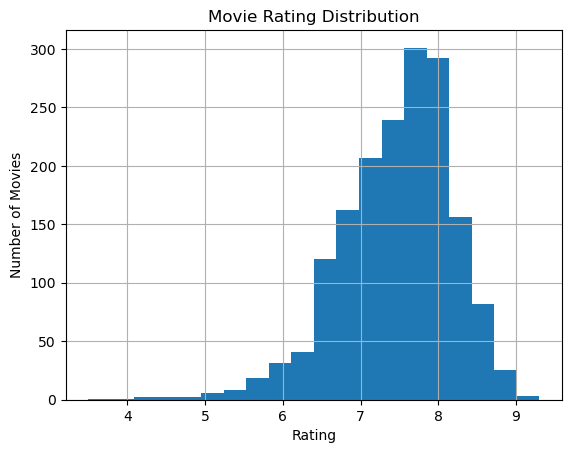

In [99]:
# Check if 'rating' column exists
print(all_movies_df['rating'].describe())

# Plot rating distribution (if matplotlib installed)
import matplotlib.pyplot as plt
all_movies_df['rating'].hist(bins=20)
plt.title('Movie Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for classification
from sklearn.neighbors import KNeighborsRegressor   # for regression
from sklearn.metrics import accuracy_score, mean_squared_error


In [144]:
# Features - example numeric columns
feature_cols = ['rating', 'duration', 'votes']  # replace with your columns

# Target column (classification example)
target_col = 'name_class'  # categorical target


In [146]:
from sklearn.preprocessing import LabelEncoder

data = all_movies_df.copy()

# Encode 'genre' to numeric values
le_genre = LabelEncoder()
data['genre_num'] = le_genre.fit_transform(data['genre'])

# Encode target 'name_class'
le_target = LabelEncoder()
y = le_target.fit_transform(data['name_class'])

# Use genre_num as feature
X = data[['genre_num']]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.96


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Assuming your DataFrame with a 'name' column is called all_movies_df
names = all_movies_df['name'].fillna('')  # fill NaNs with empty strings

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create TF-IDF matrix (each movie name represented as a vector)
tfidf_matrix = vectorizer.fit_transform(names)

# Initialize NearestNeighbors model with cosine similarity
knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit on TF-IDF matrix
knn.fit(tfidf_matrix)

# Now you can use knn.kneighbors() for finding nearest neighbors etc.


NearestNeighbors(algorithm='brute', metric='cosine')

In [150]:
import numpy as np

# Features = TF-IDF matrix (sparse matrix)
X = tfidf_matrix

# Target vector: numeric rating, fill missing or drop rows with NaN ratings
y = all_movies_df['rating'].fillna(np.mean(all_movies_df['rating']))  # or dropna()


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [154]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='cosine')
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(metric='cosine')

In [156]:
y_pred = knn_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')


Mean Squared Error: 0.406
R^2 Score: 0.163


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # For classification
from sklearn.metrics import accuracy_score, classification_report


In [160]:
# Fill missing names with empty strings
names = all_movies_df['name'].fillna('')

# Convert target labels to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_movies_df['name_class'])

# Create TF-IDF matrix of movie names
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(names)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [83]:
svm_clf = SVC(kernel='linear')  # You can try 'rbf' or others too
svm_clf.fit(X_train, y_train)


SVC(kernel='linear')